In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_genot = pd.read_csv("genot_ufgw_30_test.csv")
df_genot["model"] = "UGENOT-FGW"
df_genot["left_reweighting"] = df_genot["reweighting_0"]
df_discrete = pd.read_csv("discrete_ufgw_30_test.csv")
df_discrete["model"] = "discrete UFGW"

In [3]:
df = df_genot.merge(df_discrete, how="outer")

In [4]:
df["cell_type"] = df["cell_type"].astype("category") 

In [5]:
rest = list(set(df["cell_type"].cat.categories) - set(["Normoblast", "Erythroblast", "Proerythroblast", "MK/E prog", "HSC"]))

df["cell_type_ordered"] = pd.Categorical(df.cell_type, categories=["Normoblast", "Erythroblast", "Proerythroblast", "MK/E prog", "HSC"] + rest, ordered=True)

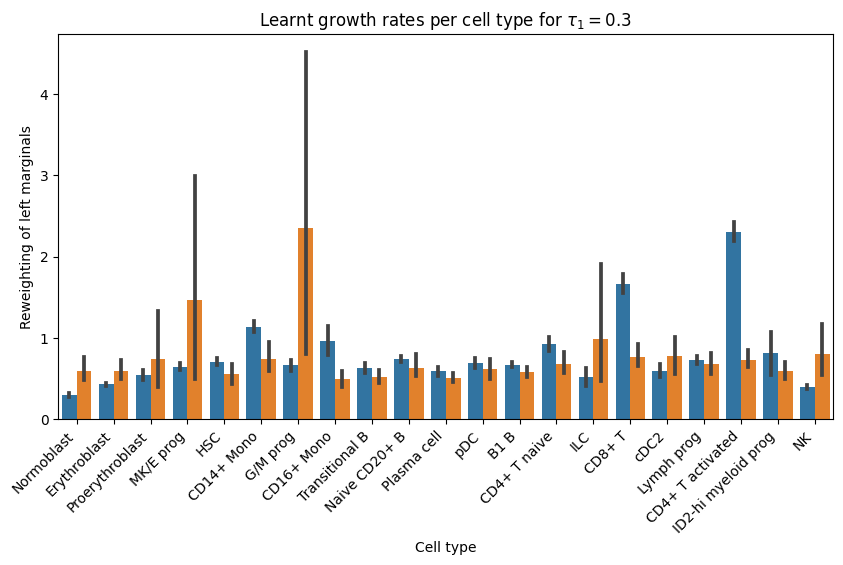

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

g = sns.barplot(df, x="cell_type_ordered", y="left_reweighting", hue="model", ax=ax)
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
g.set_ylabel("Reweighting of left marginals")
g.set_xlabel("Cell type")
g.set_title(r"Learnt growth rates per cell type for $\tau_1=0.3$")
g.get_legend().remove()